         STUDENT RESULTS ANALYSIS SYSTEM
1. Creating database...
✓ Database created successfully!
  - 30 students added
  - 8 courses added
  - 156 results recorded

2. Generating reports...

--- Report 1: Average Marks by Department ---
      department  student_count  average_marks
Computer Science              8      76.400000
         Physics              6      74.483871
     Mathematics              8      73.044444
     Engineering              8      66.375000


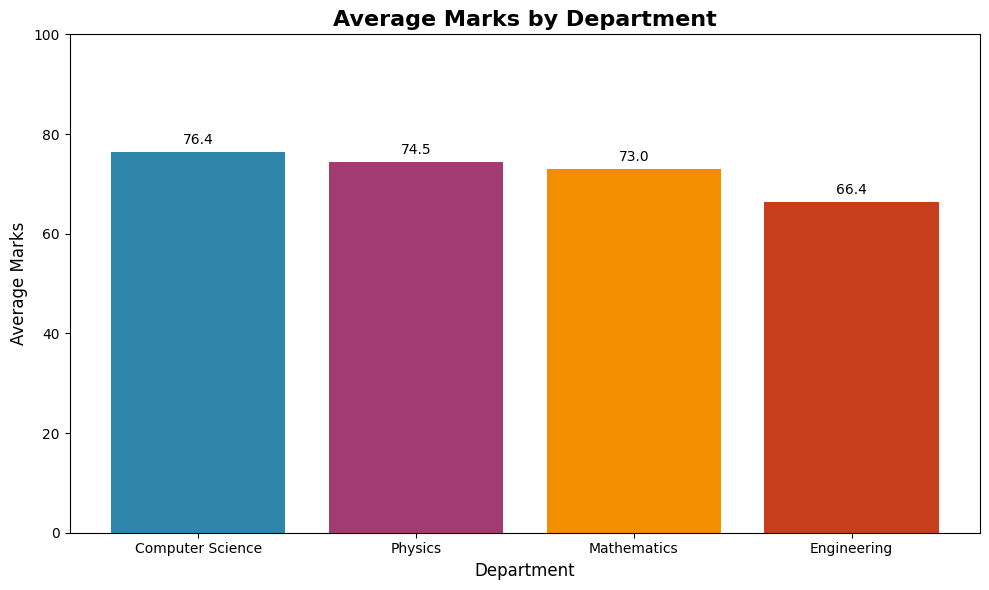

✓ Chart saved as 'report_1_department_average.png'

--- Report 2: Grade Distribution ---

Grade Distribution:
  F (Below 60): 41 students (26.3%)
  A (90-100): 32 students (20.5%)
  C (70-79): 32 students (20.5%)
  D (60-69): 26 students (16.7%)
  B (80-89): 25 students (16.0%)


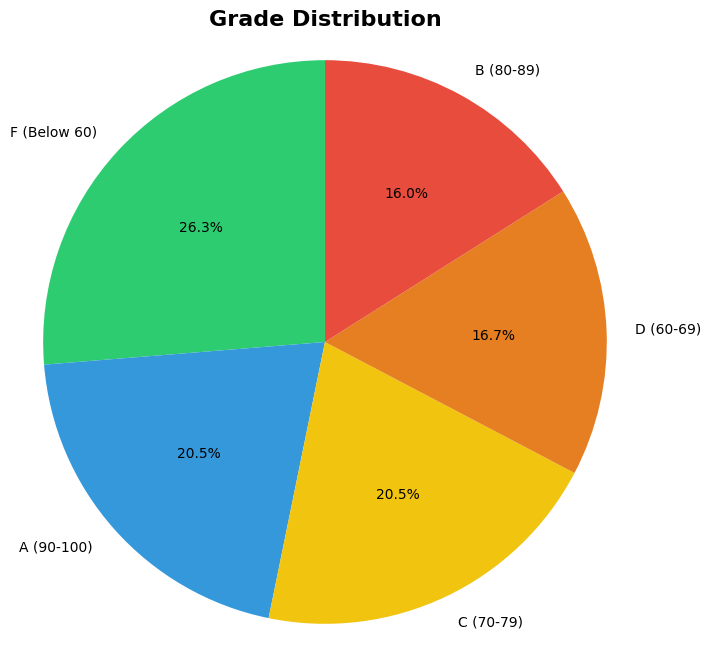

✓ Chart saved as 'report_2_grade_distribution.png'

--- Report 3: Top 10 Students ---
          name       department  enrollment_year  courses_taken   average
Youssef Hassan Computer Science             2021              5 88.000000
   Layla Salem      Engineering             2023              6 85.333333
    Noor Salem Computer Science             2023              6 82.833333
    Khaled Ali          Physics             2021              5 82.600000
  Sara Mostafa      Mathematics             2022              6 80.833333
    Noor Kamal Computer Science             2021              6 80.833333
    Fatima Ali          Physics             2020              4 79.500000
    Omar Kamal          Physics             2021              4 78.500000
  Rana Mostafa      Mathematics             2023              5 78.400000
      Noor Ali      Mathematics             2023              5 78.400000
✓ List saved as 'top_10_students.csv'

--- Report 4: Course Performance Summary ---
      course_nam

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

# ---------- Database Creation ----------
def create_simple_database():
    print("1. Creating database...")

    # Remove old database if exists
    if os.path.exists("school.db"):
        os.remove("school.db")

    # Connect to database
    conn = sqlite3.connect("school.db")
    cursor = conn.cursor()

    # Create tables
    cursor.execute("""
        CREATE TABLE students (
            id INTEGER PRIMARY KEY,
            name TEXT,
            department TEXT,
            enrollment_year INTEGER
        )
    """)

    cursor.execute("""
        CREATE TABLE courses (
            id INTEGER PRIMARY KEY,
            name TEXT,
            department TEXT
        )
    """)

    cursor.execute("""
        CREATE TABLE results (
            student_id INTEGER,
            course_id INTEGER,
            marks REAL,
            FOREIGN KEY (student_id) REFERENCES students(id),
            FOREIGN KEY (course_id) REFERENCES courses(id)
        )
    """)

    # Add mock data - Students
    students_data = []
    departments = ["Computer Science", "Mathematics", "Physics", "Engineering"]
    first_names = ["Ahmed", "Mohamed", "Sara", "Fatima", "Omar", "Layla", "Khaled", "Noor", "Youssef", "Rana"]
    last_names = ["Hassan", "Ali", "Ibrahim", "Kamal", "Salem", "Mostafa"]

    for i in range(1, 31):  # 30 students
        first = random.choice(first_names)
        last = random.choice(last_names)
        name = f"{first} {last}"
        dept = random.choice(departments)
        year = random.randint(2020, 2023)
        students_data.append((i, name, dept, year))

    cursor.executemany("INSERT INTO students VALUES (?, ?, ?, ?)", students_data)

    # Add courses
    courses_data = [
        (1, "Programming 1", "Computer Science"),
        (2, "Mathematics 1", "Mathematics"),
        (3, "Physics 1", "Physics"),
        (4, "Electric Circuits", "Engineering"),
        (5, "Database Systems", "Computer Science"),
        (6, "Calculus", "Mathematics"),
        (7, "Quantum Mechanics", "Physics"),
        (8, "Thermodynamics", "Engineering"),
    ]
    cursor.executemany("INSERT INTO courses VALUES (?, ?, ?)", courses_data)

    # Add results
    results_data = []
    for student_id in range(1, 31):
        # Each student takes 4-6 courses
        num_courses = random.randint(4, 6)
        selected_courses = random.sample(range(1, 9), num_courses)

        for course_id in selected_courses:
            marks = random.randint(45, 100)  # Random marks between 45-100
            results_data.append((student_id, course_id, marks))

    cursor.executemany("INSERT INTO results VALUES (?, ?, ?)", results_data)

    conn.commit()
    conn.close()
    print("✓ Database created successfully!")
    print(f"  - 30 students added")
    print(f"  - 8 courses added")
    print(f"  - {len(results_data)} results recorded")

# ---------- Create Reports ----------
def create_simple_reports():
    print("\n2. Generating reports...")

    # Connect to database
    conn = sqlite3.connect("school.db")

    # Report 1: Average Marks by Department
    print("\n--- Report 1: Average Marks by Department ---")
    query1 = """
        SELECT
            s.department,
            COUNT(DISTINCT s.id) as student_count,
            AVG(r.marks) as average_marks
        FROM results r
        JOIN students s ON r.student_id = s.id
        GROUP BY s.department
        ORDER BY average_marks DESC
    """
    df1 = pd.read_sql_query(query1, conn)
    print(df1.to_string(index=False))

    # Create bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df1['department'], df1['average_marks'],
                   color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
    plt.title('Average Marks by Department', fontsize=16, fontweight='bold')
    plt.xlabel('Department', fontsize=12)
    plt.ylabel('Average Marks', fontsize=12)
    plt.ylim(0, 100)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('report_1_department_average.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved as 'report_1_department_average.png'")

    # Report 2: Grade Distribution
    print("\n--- Report 2: Grade Distribution ---")
    query2 = "SELECT marks FROM results"
    df2 = pd.read_sql_query(query2, conn)

    # Classify grades
    def get_grade(marks):
        if marks >= 90: return 'A (90-100)'
        elif marks >= 80: return 'B (80-89)'
        elif marks >= 70: return 'C (70-79)'
        elif marks >= 60: return 'D (60-69)'
        else: return 'F (Below 60)'

    df2['grade'] = df2['marks'].apply(get_grade)
    grade_counts = df2['grade'].value_counts()

    print("\nGrade Distribution:")
    for grade, count in grade_counts.items():
        percentage = (count / len(df2)) * 100
        print(f"  {grade}: {count} students ({percentage:.1f}%)")

    # Create pie chart
    plt.figure(figsize=(8, 8))
    colors = ['#2ECC71', '#3498DB', '#F1C40F', '#E67E22', '#E74C3C']
    plt.pie(grade_counts.values, labels=grade_counts.index,
            autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Grade Distribution', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.savefig('report_2_grade_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved as 'report_2_grade_distribution.png'")

    # Report 3: Top 10 Students
    print("\n--- Report 3: Top 10 Students ---")
    query3 = """
        SELECT
            s.name,
            s.department,
            s.enrollment_year,
            COUNT(r.course_id) as courses_taken,
            AVG(r.marks) as average
        FROM results r
        JOIN students s ON r.student_id = s.id
        GROUP BY s.id
        HAVING courses_taken >= 4
        ORDER BY average DESC
        LIMIT 10
    """
    df3 = pd.read_sql_query(query3, conn)
    print(df3.to_string(index=False))

    # Save to CSV
    df3.to_csv("top_10_students.csv", index=False)
    print("✓ List saved as 'top_10_students.csv'")

    # Report 4: Course Performance Summary
    print("\n--- Report 4: Course Performance Summary ---")
    query4 = """
        SELECT
            c.name as course_name,
            c.department,
            COUNT(r.student_id) as enrolled_students,
            AVG(r.marks) as average_marks,
            MAX(r.marks) as highest_marks,
            MIN(r.marks) as lowest_marks
        FROM results r
        JOIN courses c ON r.course_id = c.id
        GROUP BY c.id
        ORDER BY average_marks DESC
    """
    df4 = pd.read_sql_query(query4, conn)
    print(df4.to_string(index=False))

    # Save all reports to Excel
    with pd.ExcelWriter('school_report.xlsx') as writer:
        df1.to_excel(writer, sheet_name='Department Summary', index=False)
        df3.to_excel(writer, sheet_name='Top Students', index=False)
        df4.to_excel(writer, sheet_name='Course Performance', index=False)
    print("✓ All reports saved to 'school_report.xlsx'")

    conn.close()
    print("\n✓ All reports generated successfully!")

# ---------- Main Program ----------
if __name__ == "__main__":
    print("=" * 60)
    print("         STUDENT RESULTS ANALYSIS SYSTEM")
    print("=" * 60)

    create_simple_database()
    create_simple_reports()

    print("\n" + "=" * 60)
    print("         PROGRAM COMPLETED SUCCESSFULLY!")
    print("=" * 60)
    print("\nGenerated files:")
    print("  - school.db (Database file)")
    print("  - report_1_department_average.png (Bar chart)")
    print("  - report_2_grade_distribution.png (Pie chart)")
    print("  - top_10_students.csv (CSV report)")
    print("  - school_report.xlsx (Excel report)")